In [1]:
import mat73
import numpy as np
import matplotlib.pyplot as plt

In [2]:
loaded = mat73.loadmat("./exp-5.mat")
#loaded["results"].shape # 10 different amplitude and 10 different wl
results = loaded["results"]

In [3]:
nn = 20

numB = np.zeros((100,nn+1))
for ii in range(100):
    for ni in range(nn+1):
        nidx = np.arange(2**ni+1) * 2**(nn-ni)
        nresult = results[nidx,ii]
        numB[ii,ni] = np.sum((nresult[:-1] != nresult[1:]).astype(float))

In [4]:
numB[numB == 0] = 1

In [7]:
fracdims = np.zeros(100)
cuts = np.zeros(100)
fracdimerr = np.zeros(100)

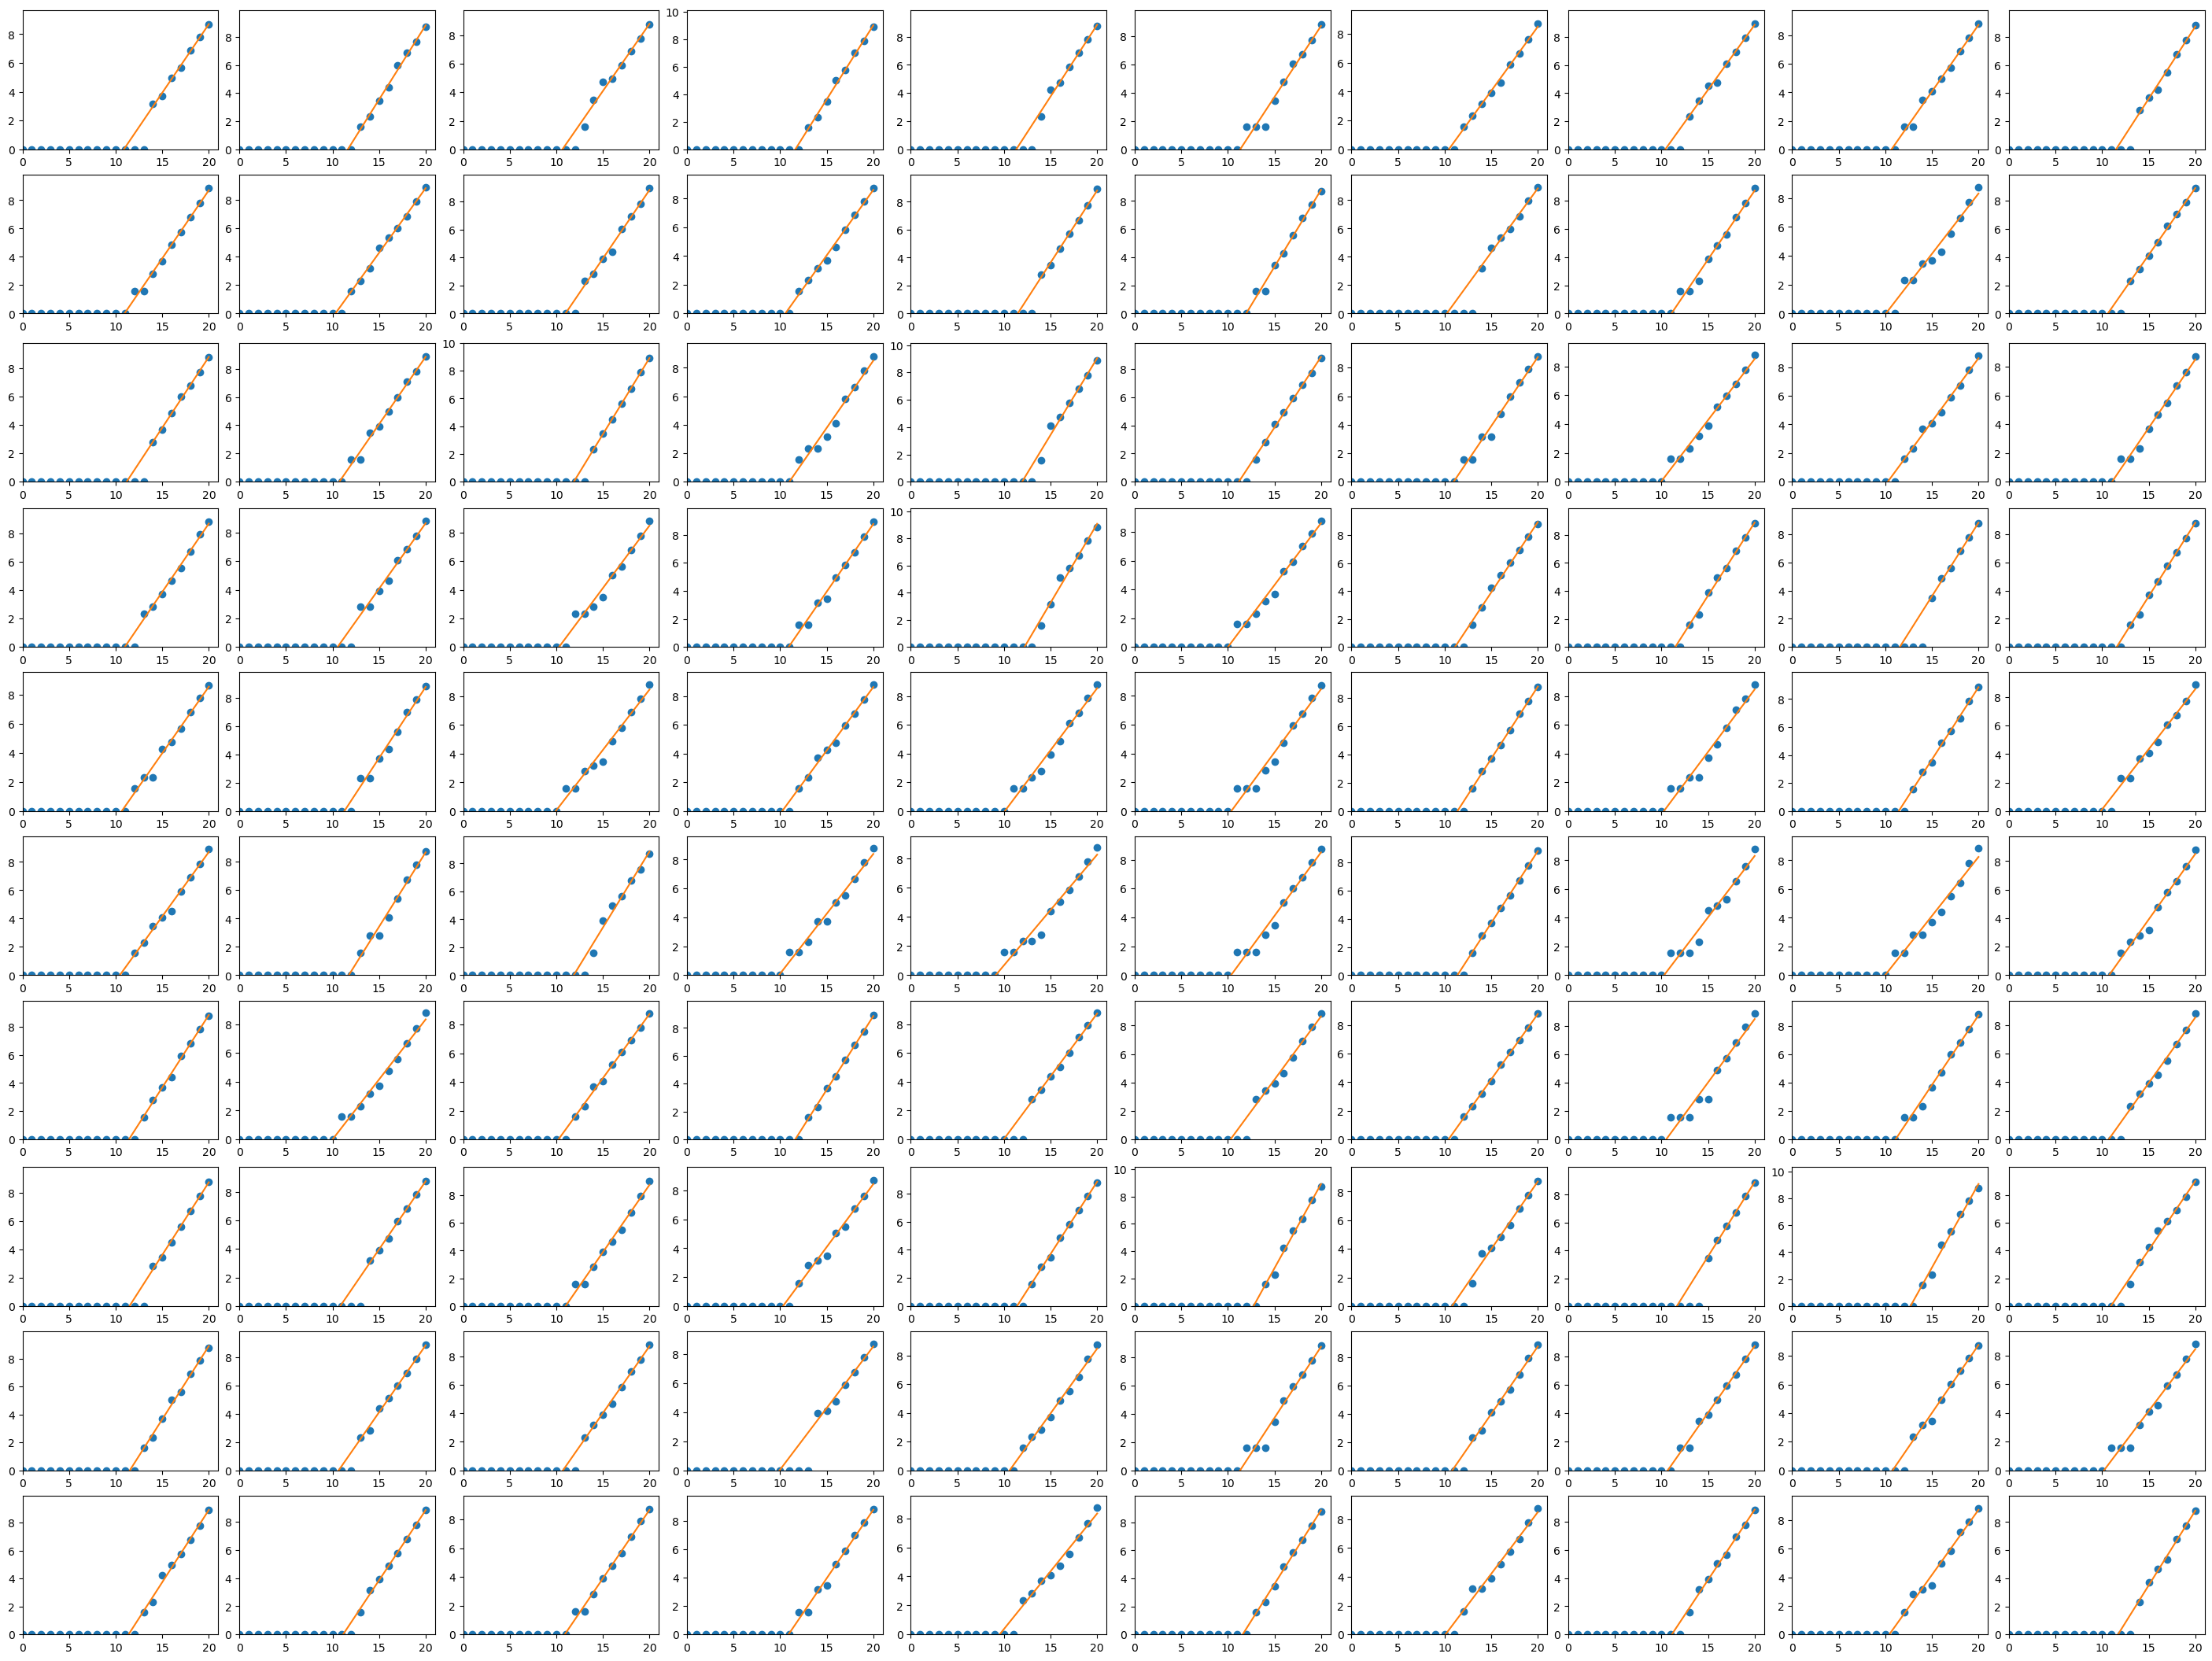

In [8]:
fig, axs = plt.subplots(10,10, figsize=(28, 21), constrained_layout=True)
for i in range(10):
    for j in range(10):
        axs[i, j].plot(np.arange(nn+1), np.log2(numB[i*10+j]),'o')
        if np.sum(np.log2(numB[i*10+j,:])>0) > 1:
            pp, VV = np.polyfit(np.arange(nn+1)[np.log2(numB[i*10+j,:])>0], np.log2(numB[i*10+j,:])[np.log2(numB[i*10+j,:])>0], 1, cov=True)
            slope, cut = pp
            fracdims[i*10+j] = slope
            cuts[i*10+j] = cut
            fracdimerr[i*10+j] = np.sqrt(VV[0][0])
        axs[i, j].plot(np.arange(nn+1), slope * np.arange(nn+1) + cut)
        axs[i, j].set_ylim(0,)
        axs[i, j].set_xlim(0,)
        #axs[i, j].set_title('pH of Comm. '+str(ii+1))
plt.savefig('./figures/exp-5SI.pdf')

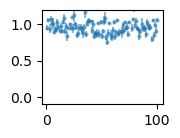

In [18]:
plt.figure(figsize=(3.375/2, 3.375/8*3), constrained_layout=True)
plt.errorbar(range(1,101), fracdims, fracdimerr,marker='o',linestyle='none',ms = 2,alpha = .5)
plt.ylim(-.1,1.2)
plt.savefig('./figures/exp-5.pdf')

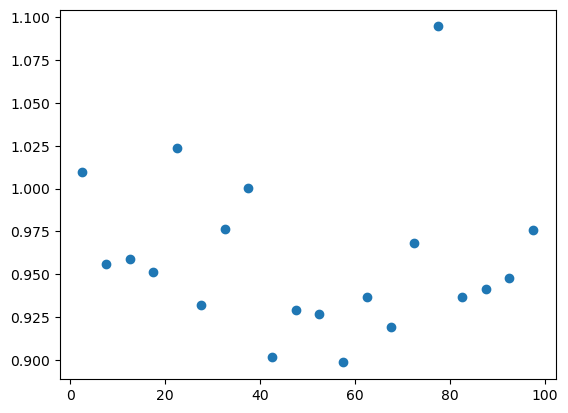

In [10]:
plt.plot(np.arange(2.5,97.5+5,5), np.mean(fracdims.reshape(20,5), axis=1),'o')